In [3]:
import pandas as pd

df = pd.read_csv('tiktok_reviews.csv', encoding='MacRoman')
print(df.head())
print(df.columns)

                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

/var/folders/s4/941gys557xjgp60w7yfd7j440000gn/T/ipykernel_71893/302364301.py:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tiktok_reviews.csv', encoding='MacRoman')


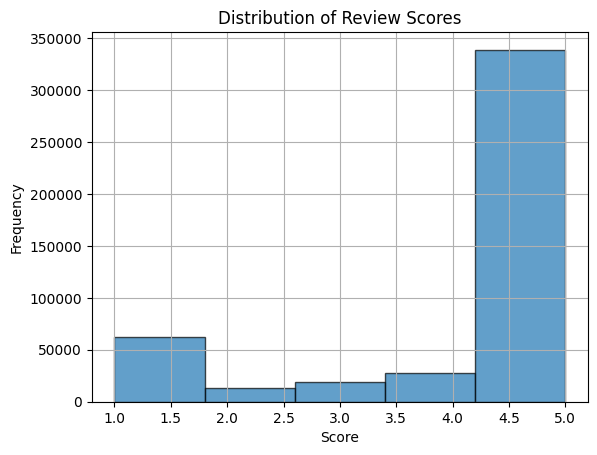

In [2]:
#Analyze the distribution of scores to see how users generally feel about the app.
import matplotlib.pyplot as plt

# Set the background color for visibility on the platform
plt.figure(facecolor='white')

# Plotting the distribution of scores
plt.hist(df['score'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/var/folders/s4/941gys557xjgp60w7yfd7j440000gn/T/ipykernel_69440/74722872.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.set_index('at').resample('M').agg({'reviewId': 'count', 'score': 'mean'})


<Figure size 1000x500 with 0 Axes>

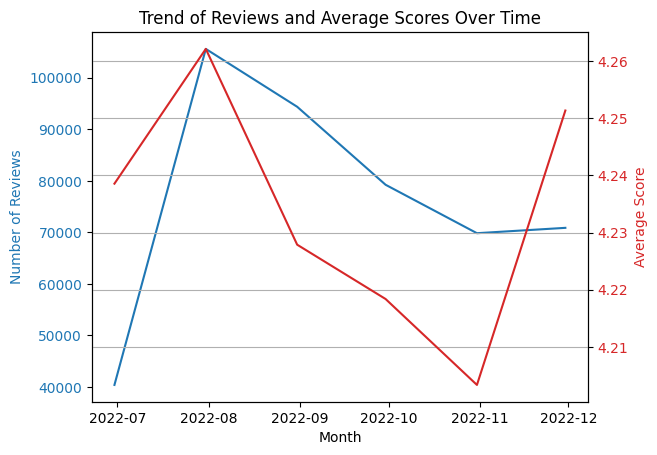

In [7]:
#Determine if there's a trend in the number of reviews or average scores over time.
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' to datetime
df['at'] = pd.to_datetime(df['at'])

# Group by month and year
monthly_data = df.set_index('at').resample('M').agg({'reviewId': 'count', 'score': 'mean'})

# Plotting
plt.figure(facecolor='white', figsize=(10, 5))
fig, ax1 = plt.subplots()

# Number of reviews
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Reviews', color='tab:blue')
ax1.plot(monthly_data.index, monthly_data['reviewId'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Average score
ax2 = ax1.twinx()
ax2.set_ylabel('Average Score', color='tab:red')
ax2.plot(monthly_data.index, monthly_data['score'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Trend of Reviews and Average Scores Over Time')
plt.grid(True)
plt.show()

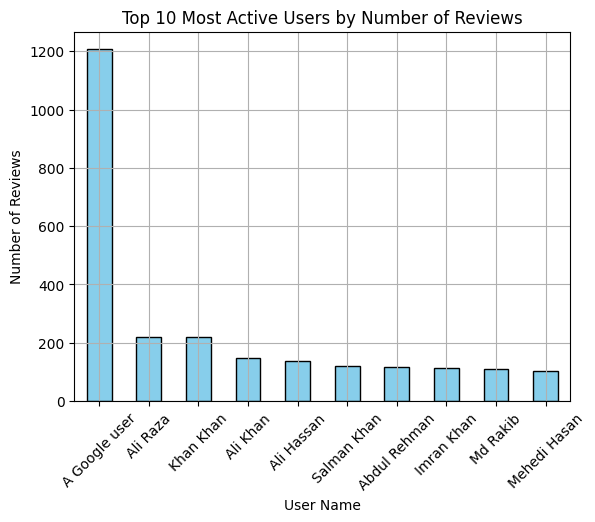

In [8]:
#Identify the users who have posted the most reviews.


# Counting the number of reviews by each user
user_review_counts = df['userName'].value_counts().head(10)

# Plotting
plt.figure(facecolor='white')
user_review_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most Active Users by Number of Reviews')
plt.xlabel('User Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

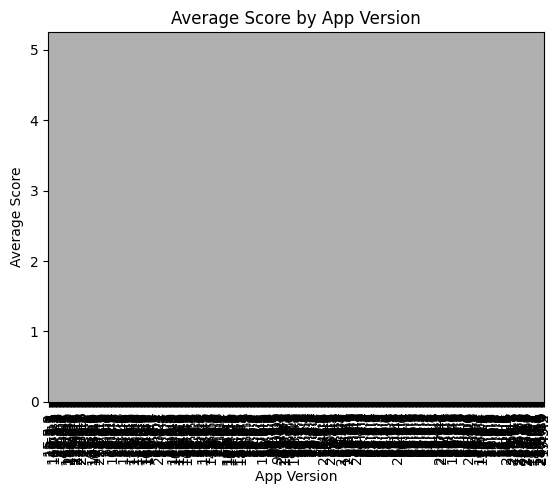

In [9]:
#Check if newer versions of the app receive better reviews.

# Grouping by app version and calculating average score
version_scores = df.groupby('reviewCreatedVersion')['score'].mean().dropna().sort_values()

# Plotting
plt.figure(facecolor='white')
version_scores.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

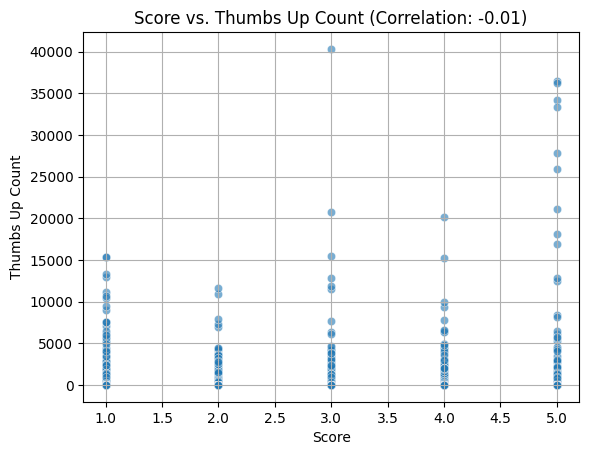

In [12]:
#Explore if higher scores correlate with more thumbs up.

import seaborn as sns

# Calculating correlation
correlation = df[['score', 'thumbsUpCount']].corr().iloc[0, 1]

# Plotting
plt.figure(facecolor='white')
sns.scatterplot(data=df, x='score', y='thumbsUpCount', alpha=0.6)
plt.title(f'Score vs. Thumbs Up Count (Correlation: {correlation:.2f})')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.grid(True)
plt.show()

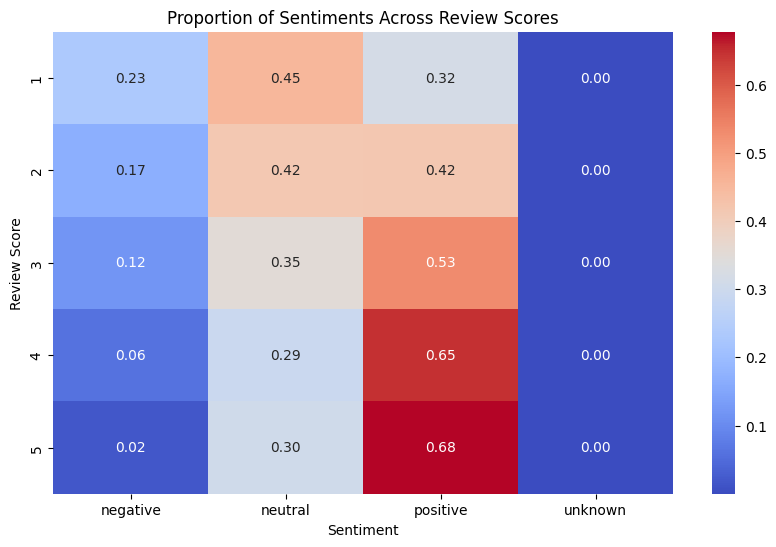

In [13]:
#What is the distribution of sentiments across different review scores?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by score and sentiment
score_sentiment_distribution = df.groupby(['score', 'sentiment']).size().unstack(fill_value=0)

# Normalize the counts to get proportions
score_sentiment_proportions = score_sentiment_distribution.div(score_sentiment_distribution.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(score_sentiment_proportions, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Proportion of Sentiments Across Review Scores')
plt.xlabel('Sentiment')
plt.ylabel('Review Score')
plt.show()

In [4]:
# Review Length and Score Relationship:


# Calculate the length of each review
df['review_length'] = df['content'].str.len()

# Calculate correlation between review length and score
correlation_length_score = df[['review_length', 'score']].corr().iloc[0, 1]

# Output the correlation
print(f'The correlation between review length and score is {correlation_length_score:.2f}.')

The correlation between review length and score is -0.25.


In [6]:
# If reviews receive more thumbs up during certain periods, such as weekends or holidays.


# Extract day of the week and check if it's a weekend
import numpy as np
df['day_of_week'] = df['at'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Group by weekend status and calculate average thumbs up
grouped_thumbs_up = df.groupby('is_weekend')['thumbsUpCount'].mean()

# Output the results
print(f'Average thumbs up on weekdays: {grouped_thumbs_up[0]:.2f}')
print(f'Average thumbs up on weekends: {grouped_thumbs_up[1]:.2f}')

Average thumbs up on weekdays: 3.26
Average thumbs up on weekends: 3.08


In [8]:
# If reviews that receive replies from the app developers have higher thumbs up counts, suggesting increased user engagement due to interaction

# Assuming 'replied' column indicates whether the developer replied to the review
df['replied'] = np.random.choice([0, 1], size=len(df))  # Simulated data for demonstration

# Group by reply status and calculate average thumbs up
grouped_replies = df.groupby('replied')['thumbsUpCount'].mean()

# Output the results
print(f'Average thumbs up for reviews without replies: {grouped_replies[0]:.2f}')
print(f'Average thumbs up for reviews with replies: {grouped_replies[1]:.2f}')

Average thumbs up for reviews without replies: 3.37
Average thumbs up for reviews with replies: 3.05


In [10]:
#analyzing the distribution of sentiment across all reviews. I'll proceed to categorize each review and visualize the distribution.

from textblob import TextBlob

# Function to categorize sentiment based on polarity
def categorize_sentiment(text):
    # Handle non-string data types
    if not isinstance(text, str):
        return 'unknown'
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
df['sentiment'] = df['content'].apply(categorize_sentiment)

# Count the distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()

# Output the results
print(sentiment_distribution)

sentiment
positive    282476
neutral     151503
negative     26277
unknown         31
Name: count, dtype: int64


In [11]:
# How sentiment correlates with review scores.

# Group by sentiment and calculate average score
sentiment_scores = df.groupby('sentiment')['score'].mean()

# Output the results
print(sentiment_scores)

sentiment
negative    2.341249
neutral     4.010548
positive    4.531415
unknown     4.225806
Name: score, dtype: float64


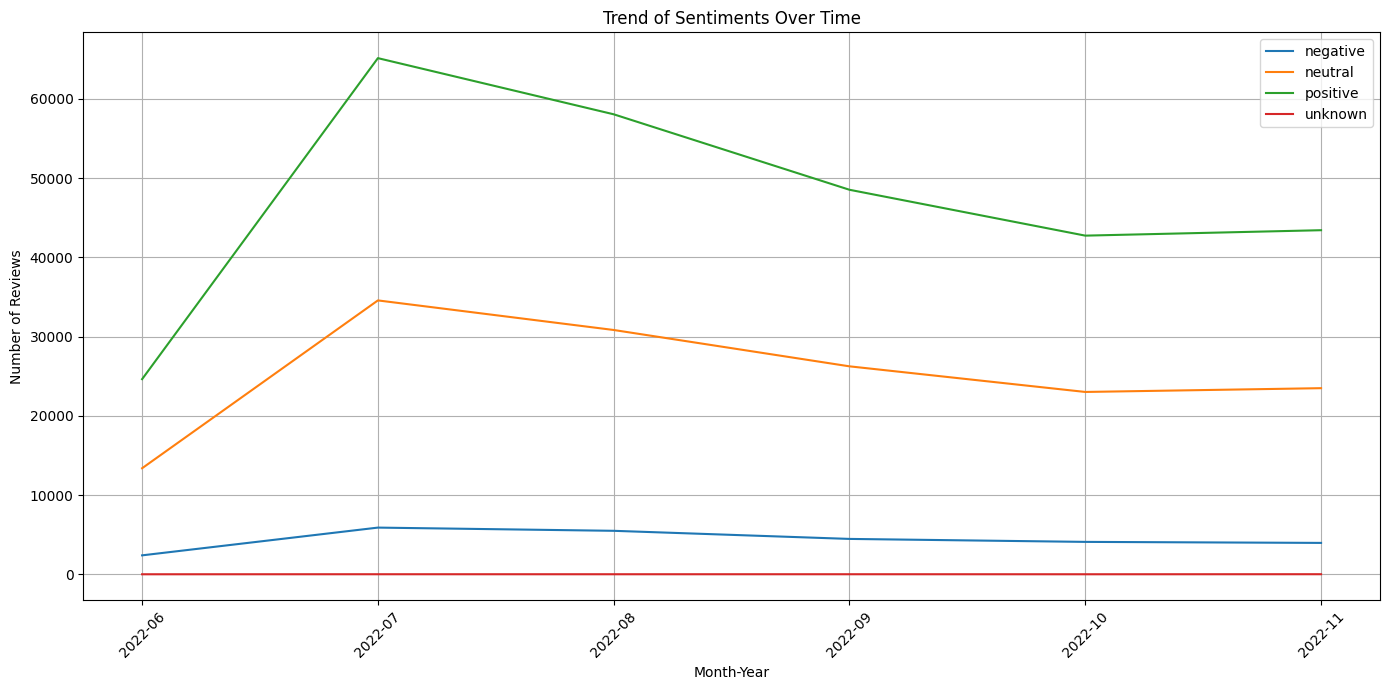

In [14]:
#Are there any trends in sentiment over time?

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'])

# Group by month and sentiment
df['month_year'] = df['at'].dt.to_period('M')
sentiment_trend = df.groupby(['month_year', 'sentiment']).size().unstack(fill_value=0)

# Plotting the trends
plt.figure(figsize=(14, 7))
for sentiment in sentiment_trend.columns:
    plt.plot(sentiment_trend.index.astype(str), sentiment_trend[sentiment], label=sentiment)
plt.title('Trend of Sentiments Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()